## Kirk's Approximation for pricing Spread Options

The payoff of a spread option on two futures contracts is given by
$$ c_T =  {\rm max}[0,F_1-F_2-K]  $$
where $F_1$ and $F_2$ are the prices of the future contracts and $K$ is a constant spread.

In Kirk's approximation we take $Z(T)=F_2(T)+K$ to have a lognormal distribution with initial value $Z(0) = F_2+Ke^{-rT}$.\
The volatility for $Z$ is value wieghted  using the relative proportions for the positions:
$$ \sigma_Z = \frac{F_2}{F_2+Ke^{-rT}} \sigma_2 $$


Lets' take the generalized Black-Scholes equation with
$$ S= F_1 \hspace{1cm} {\rm Strike} = F_2+K$$

from which we obtain the value of the call
$$ c= (F_2+K) e^{-rt}[F \, N(d_1) - N(d_2)]$$
where 
$$ d_1 = \frac{\ln F + \sigma^2T/2 }{\sigma \sqrt{T}}  \hspace{1cm} d_2 = d_1 - \sigma \sqrt{T}$$
and 
$$F=\frac{F_1}{F_2+K}$$ 
The volatility of $F$ can be approximated as 
$$ \sigma = \sqrt{\sigma_1^2+ \left(\frac{\sigma_2 F_2}{F_2+K}\right)^2- \frac{2 \, \rho \, \sigma_1 \sigma_2 F_2}{F_2+K}} $$
where $\rho$ is the correlation between the two futures contracts. Kirk's approoximation works for small $K$.



In [2]:
# ========================== Black-Scholes and Greeks ===========================
# Author: Alexis D. Plascencia
# We implement the Greeks for Spread Options using Kirk's approximation
# ===============================================================================

import numpy as np
import matplotlib.pylab as plt
import scipy.stats as ss
import pandas as pd
import seaborn as sns

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

## Delta

We can have either Delta with respect to $F_1$:
$$ \Delta_1 = \frac{\partial c}{\partial F_1} = e^{-rT} N(d_1) $$
or with respect to $F_2$:
$$ \Delta_2 = \frac{\partial c}{\partial F_2} = e^{-rT} \left[ -N(d_2) +(F_2+K) e^{-d_2^2/2} \sqrt{T}  \frac{\partial \sigma}{\partial F_2} \right]$$
and we have that 
$$  \frac{\partial \sigma}{\partial F_2} = \frac{ \sigma_2 K (\beta - \rho \sigma_1)  }{ \sigma (F_2+K)^2 } $$
where
$$ \beta =\frac{\sigma_2 F_2}{F_2+K} $$

In [23]:
F1 = np.linspace(0,240,240)
r = 0.1
T = 2.
K = 20.
time = 0.
eps = 1.e-8  # This is to avoid divergences
#F1 = 400.
F2 = 100.
F = F1/(F2+K)
sigma1=0.1
sigma2=0.1
beta = sigma2*F2/(F2+K)
rho = 0. 
sigma = np.sqrt(sigma1**2.+beta**2.-2*rho*sigma1*beta)

# We use the analytic solution for the Call and Put pricing
d1 = (np.log(F) + (0.5*sigma**2.)*(T-time))/(sigma*np.sqrt(T-time) + eps)
d2 = d1 - sigma*np.sqrt(T-time)

Delta1 = np.exp(-r*T)*ss.norm.cdf(d1)
Delta2 = np.exp(-r*T)*-ss.norm.cdf(d2)+(F2+K)*np.exp(-d2**2./2.)*np.sqrt(T)*sigma2*K*(beta-rho*sigma1)/(sigma1*(F2+K)**2.)

/tmp/ipykernel_73383/2789881859.py:17: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(F) + (0.5*sigma**2.)*(T-time))/(sigma*np.sqrt(T-time) + eps)


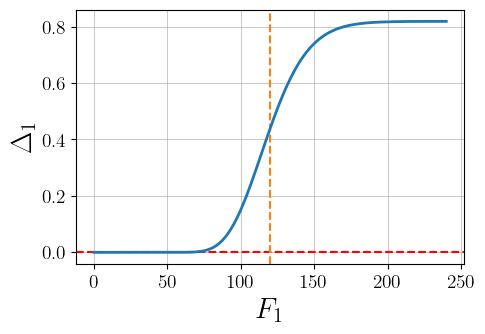

In [24]:
fig = plt.figure(figsize=(5,3.3)) 
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.tick_params(axis='both', which='both', direction='in')
ax.set_xlabel(r'$F_1$', fontsize=21)
ax.set_ylabel(r'$\Delta_1$', fontsize=21)
ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
ax.axvline(120, ymin=0, ymax=1, color='tab:orange',  linewidth=1.5, ls='dashed')
#ax.set_xlim(0, 200) 
#ax.set_ylim(-0.5, 1) 

plt.plot(F1,Delta1,color='tab:blue', linewidth=2)
#plt.plot(S,gamma,color='tab:blue', linewidth=2)
#ax.set_title(r'${\rm Integration\,\, region}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)

In [17]:
F2 = np.linspace(0,240,240)
r = 0.1
T = 2.
K = 20.
time = 0.
eps = 1.e-8  # This is to avoid divergences
#F1 = 400.
F1 = 100.
F = F1/(F2+K)
sigma1=0.1
sigma2=0.1
beta = sigma2*F2/(F2+K)
rho = 0. 
sigma = np.sqrt(sigma1**2.+beta**2.-2*rho*sigma1*beta)

# We use the analytic solution for the Call and Put pricing
d1 = (np.log(F) + (0.5*sigma**2.)*(T-time))/(sigma*np.sqrt(T-time) + eps)
d2 = d1 - sigma*np.sqrt(T-time)

Delta1 = np.exp(-r*T)*ss.norm.cdf(d1)
Delta2 = np.exp(-r*T)*-ss.norm.cdf(d2)+(F2+K)*np.exp(-d2**2./2.)*np.sqrt(T)*sigma2*K*(beta-rho*sigma1)/(sigma1*(F2+K)*2.)

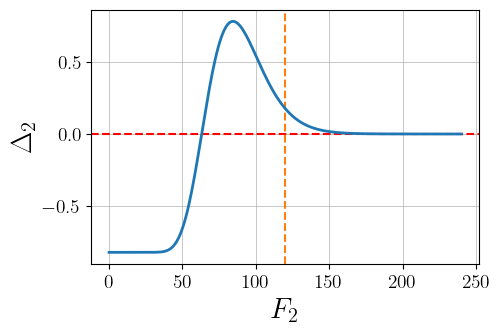

In [22]:
fig = plt.figure(figsize=(5,3.3))  #7,5
ax = fig.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.tick_params(axis='both', which='both', direction='in')
ax.set_xlabel(r'$F_2$', fontsize=21)
ax.set_ylabel(r'$\Delta_2$', fontsize=21)
ax.axhline(0, xmin=0, xmax=1, color='red',  linewidth=1.5, ls='dashed')
ax.axvline(120, ymin=0, ymax=1, color='tab:orange',  linewidth=1.5, ls='dashed')
#ax.set_xlim(0, 200) 
#ax.set_ylim(-0.5, 1) 

plt.plot(F2,Delta2,color='tab:blue', linewidth=2)
#plt.plot(S,gamma,color='tab:blue', linewidth=2)
#ax.set_title(r'${\rm Integration\,\, region}$', fontsize=20, color='black')   
ax.grid(linewidth=0.5)